In [2]:
import pandas as pd 
import numpy as np

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


1. LOAD THE DATA

In [4]:
test_data = pd.read_csv(r'C:\Users\ADMIN\Downloads\FIFA 19 PC full game ^^nosTEAM^^\test.csv')

In [5]:
test_data

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,758.0,25.0,0.50,0.38,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.551264,0.479011,39.337772
1,15001,12.0,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.387861,0.395894,30.057704
2,15002,97.0,12.5,0.25,0.25,0.25,0.38,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.496618,0.444147,35.557537
3,15003,585.0,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.483873,0.445494,35.118739
4,15004,295.0,12.5,0.25,0.25,0.63,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.561190,0.477182,40.641638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,731.0,25.0,0.50,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.482854,0.442557,35.184412
9996,24996,749.0,25.0,0.50,0.38,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.572046,0.482875,40.402916
9997,24997,134.0,12.5,0.25,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.529678,0.457829,36.624966
9998,24998,425.0,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.564982,0.472670,39.589169


In [6]:
train_data = pd.read_csv(r'C:\Users\ADMIN\Downloads\FIFA 19 PC full game ^^nosTEAM^^\train.csv')

In [7]:
train_data

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,539.0,25.0,0.50,0.25,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.498716,0.442789,35.697203,5830.89362
1,1,691.0,25.0,0.50,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.502842,0.443755,35.285926,6190.66597
2,2,775.0,25.0,0.50,0.38,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.385022,0.399556,30.052521,3923.90628
3,3,49.0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.346411,0.388819,29.631796,3680.56025
4,4,556.0,25.0,0.50,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.403311,0.401670,30.806856,4576.10071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,714.0,25.0,0.50,0.38,0.50,0.63,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.509934,0.427938,35.874495,6422.92209
14996,14996,726.0,25.0,0.50,0.38,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.508342,0.459224,37.966864,6263.80788
14997,14997,145.0,12.5,0.25,0.25,0.38,0.38,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.483671,0.417909,35.557537,6521.29112
14998,14998,28.0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.372318,0.395636,30.795613,4278.76321


In [8]:
# Display basic information about the datasets
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [9]:
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   Row#                  10000 non-null  float64
 2   clonesize             10000 non-null  float64
 3   honeybee              10000 non-null  float64
 4   bumbles               10000 non-null  float64
 5   andrena               10000 non-null  float64
 6   osmia                 10000 non-null  float64
 7   MaxOfUpperTRange      10000 non-null  float64
 8   MinOfUpperTRange      10000 non-null  float64
 9   AverageOfUpperTRange  10000 non-null  float64
 10  MaxOfLowerTRange      10000 non-null  float64
 11  MinOfLowerTRange      10000 non-null  float64
 12  AverageOfLowerTRange  10000 non-null  float64
 13  RainingDays           10000 non-null  float64
 14  AverageRainingDays    10000 non-null  float64
 15  fruitset            

In [10]:
# Display summary statistics
print(train_data.describe())

                 id          Row#     clonesize      honeybee       bumbles  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean    7499.500000    426.624933     19.782167      0.388205      0.285111   
std     4330.271354    215.732093      6.667215      0.390200      0.058730   
min        0.000000      0.000000     12.500000      0.000000      0.000000   
25%     3749.750000    245.000000     12.500000      0.250000      0.250000   
50%     7499.500000    466.000000     25.000000      0.500000      0.250000   
75%    11249.250000    599.000000     25.000000      0.500000      0.380000   
max    14999.000000    776.000000     37.500000     18.430000      0.585000   

           andrena         osmia  MaxOfUpperTRange  MinOfUpperTRange  \
count  15000.00000  15000.000000      15000.000000      15000.000000   
mean       0.48702      0.589461         82.091027         49.626007   
std        0.14885      0.146798          9.125708          5.533023   


In [11]:
print(test_data.describe())

                id           Row#     clonesize      honeybee       bumbles  \
count  10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean   19999.50000     501.058700     19.777000      0.389969      0.284468   
std     2886.89568    7070.781082      6.634355      0.398516      0.059013   
min    15000.00000       0.000000     12.500000      0.000000      0.000000   
25%    17499.75000     253.000000     12.500000      0.250000      0.250000   
50%    19999.50000     469.000000     25.000000      0.500000      0.250000   
75%    22499.25000     596.250000     25.000000      0.500000      0.380000   
max    24999.00000  707191.000000     37.500000     18.430000      0.630000   

           andrena         osmia  MaxOfUpperTRange  MinOfUpperTRange  \
count  10000.00000  10000.000000      10000.000000      10000.000000   
mean       0.48861      0.592312         82.345580         49.778680   
std        0.14848      0.145804          9.182504          5.567156   


2. PERFORM EDA

In [12]:
# Check for missing values
print(train_data.isnull().sum())


id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


In [13]:
print(test_data.isnull().sum())


id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64


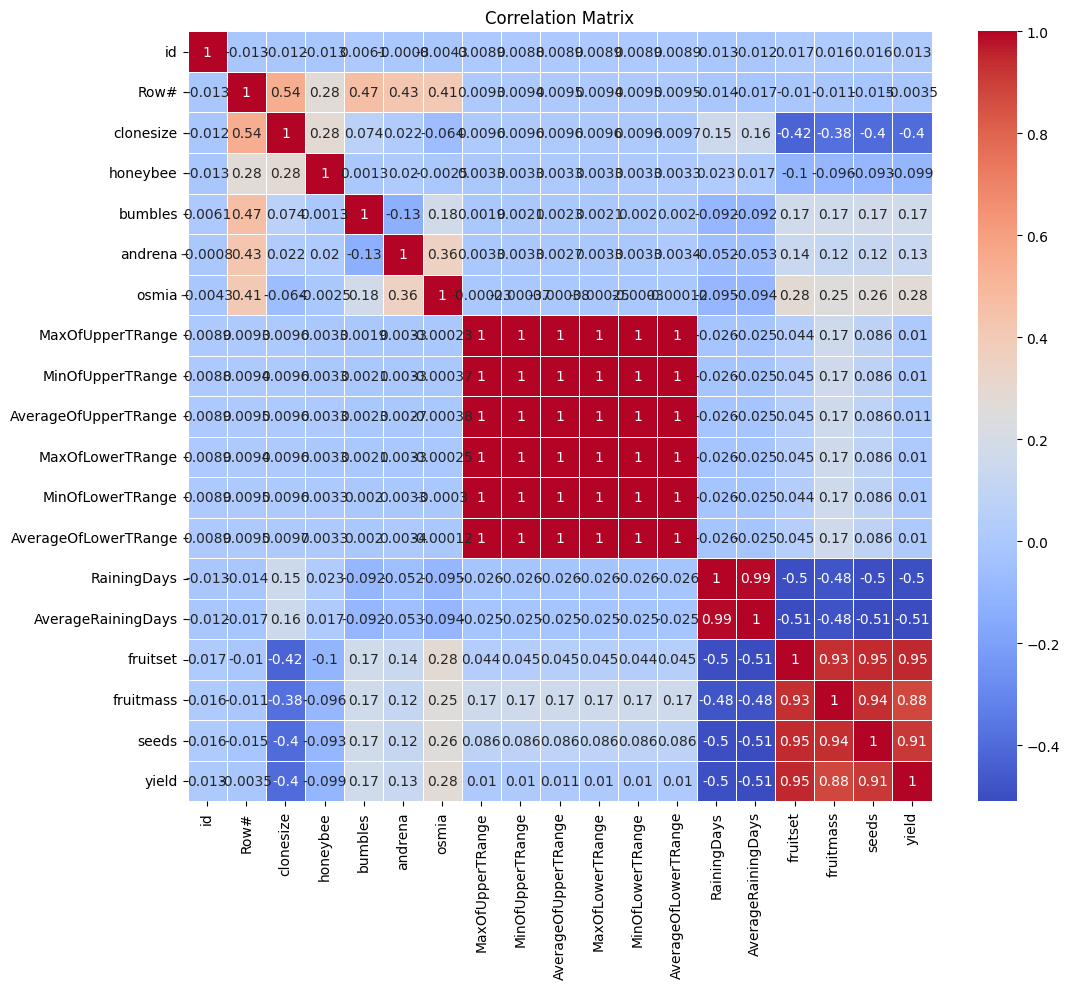

In [14]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

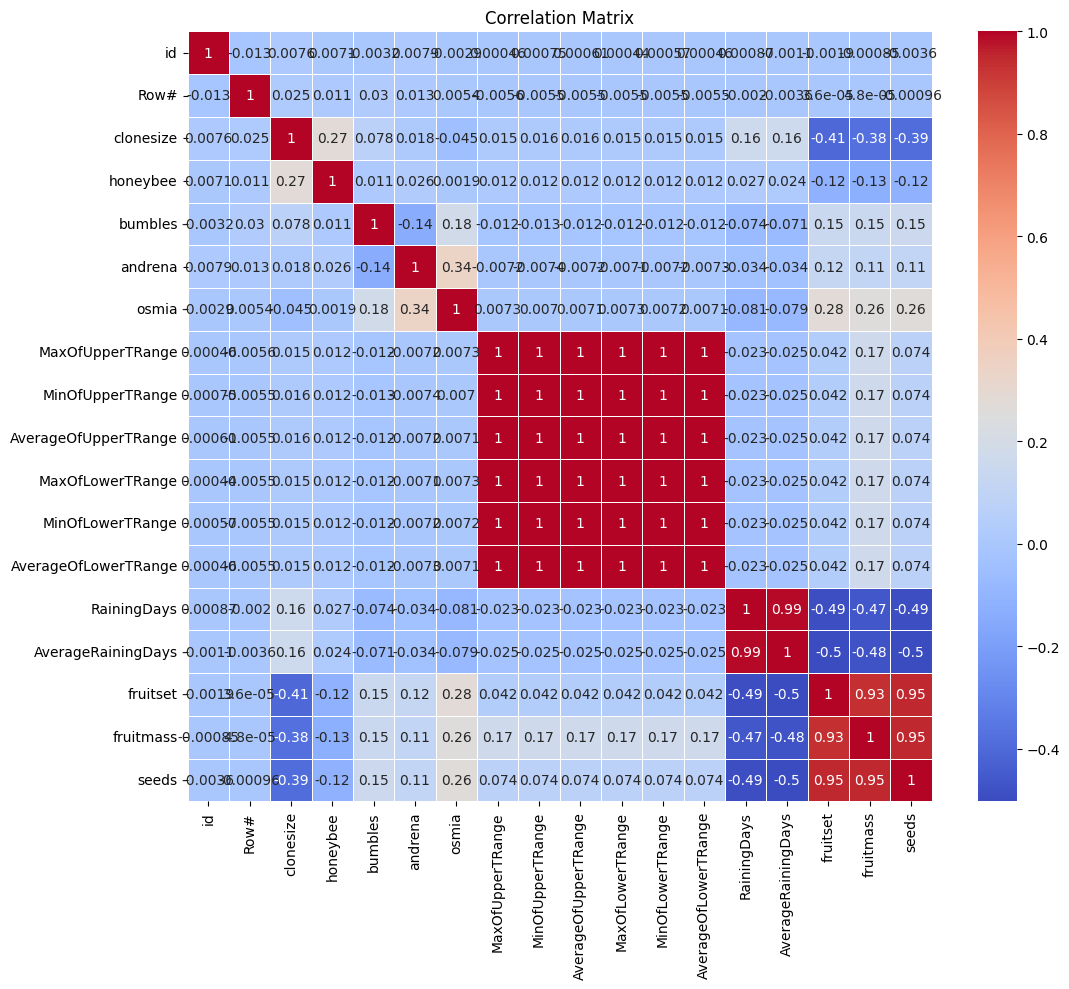

In [15]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(test_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

3. CHECK FOR MULTI-COLLINEARITY

In [16]:
! pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Calculate VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif


In [18]:
X = train_data.drop(['id', 'yield'], axis=1)
vif_data = calculate_vif(X)
print(vif_data)

                features           VIF
0                   Row#  1.831521e+01
1              clonesize  1.927130e+01
2               honeybee  2.296776e+00
3                bumbles  4.349468e+01
4                andrena  2.001529e+01
5                  osmia  2.482161e+01
6       MaxOfUpperTRange  8.911169e+05
7       MinOfUpperTRange  3.646840e+05
8   AverageOfUpperTRange  9.159397e+04
9       MaxOfLowerTRange  4.372778e+05
10      MinOfLowerTRange  2.082085e+06
11  AverageOfLowerTRange  2.673048e+05
12           RainingDays  2.143062e+02
13    AverageRainingDays  2.969422e+02
14              fruitset  4.747580e+02
15             fruitmass  1.144462e+03
16                 seeds  9.921086e+02


4. VISUALIZE DITRIBUTON

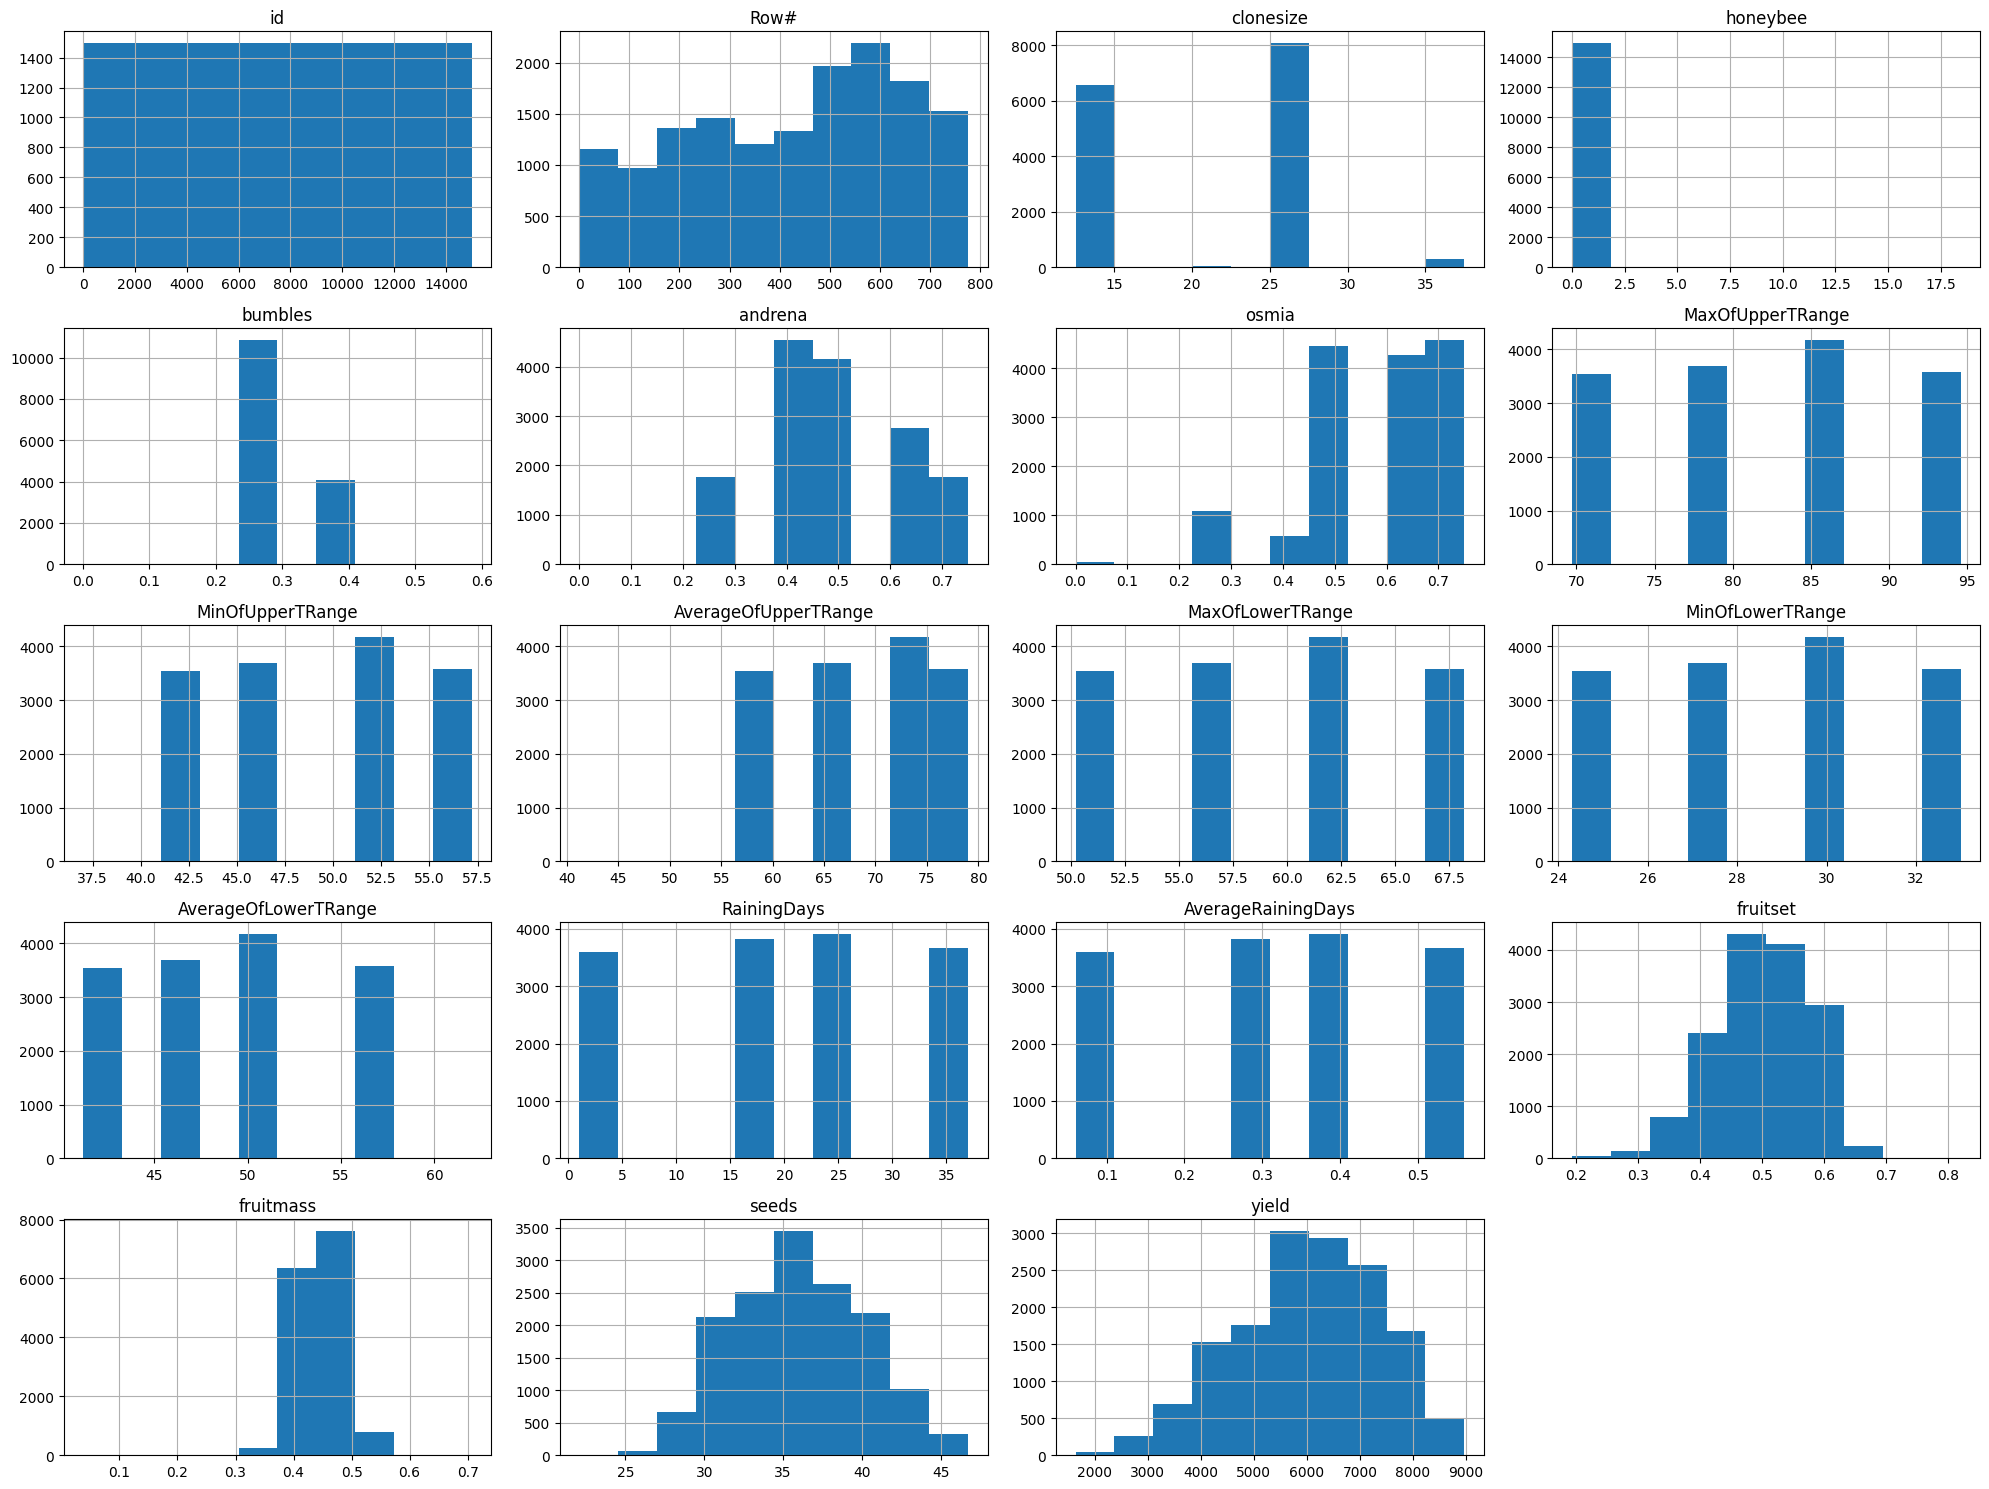

In [19]:
# Plot histogram for numerical features
train_data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

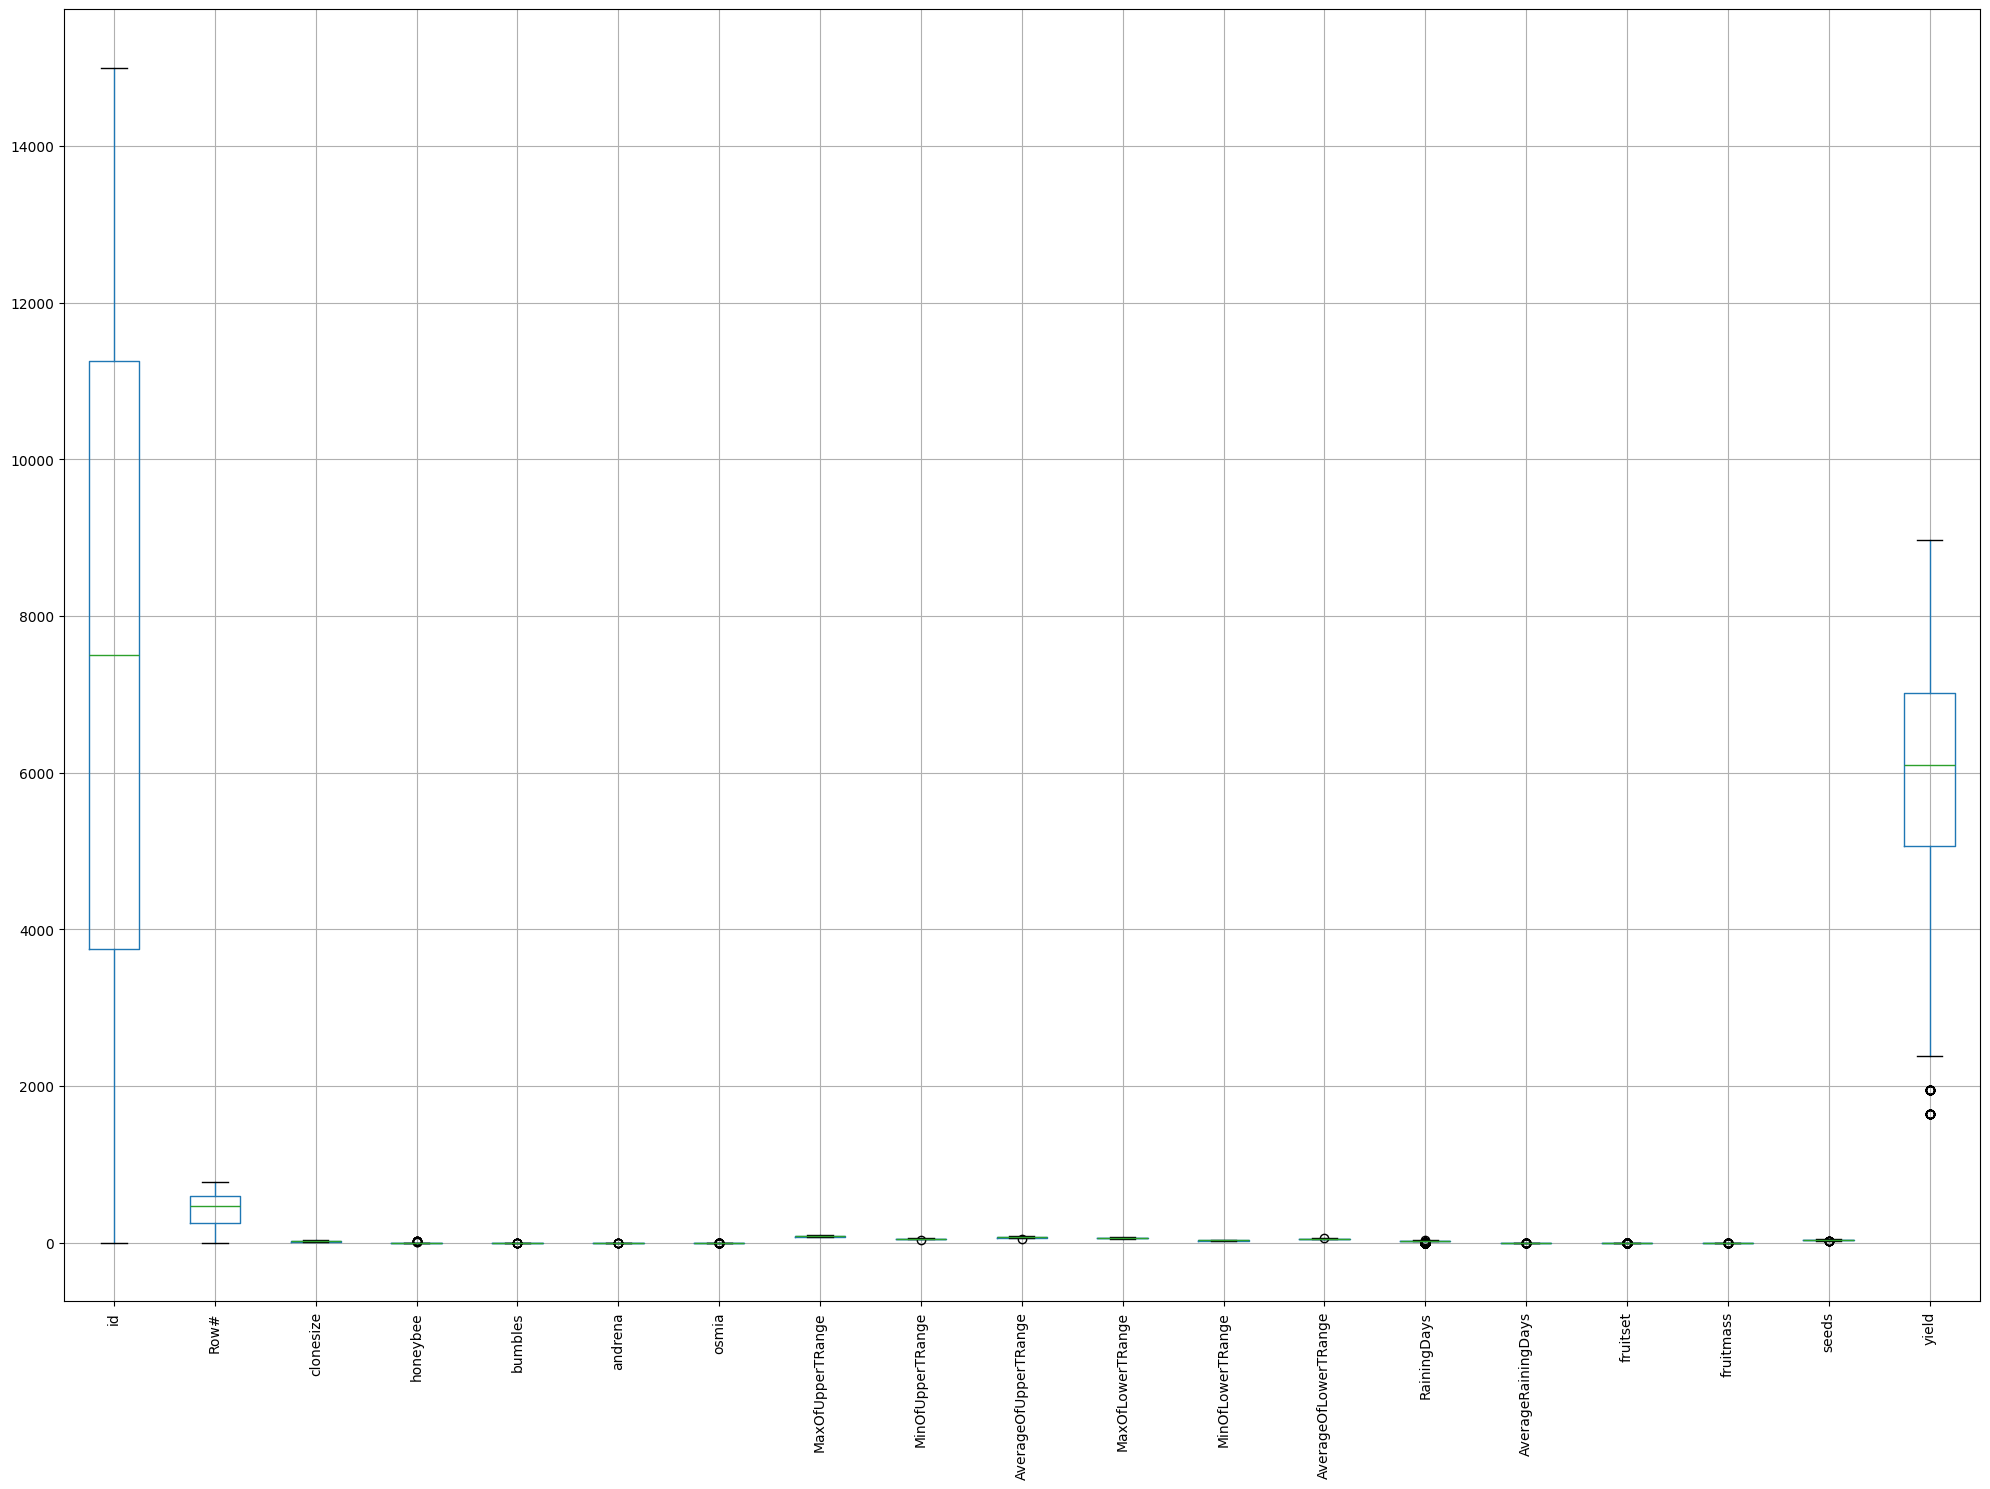

In [20]:
# Box plots for numerical features
plt.figure(figsize=(20, 15))
train_data.boxplot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

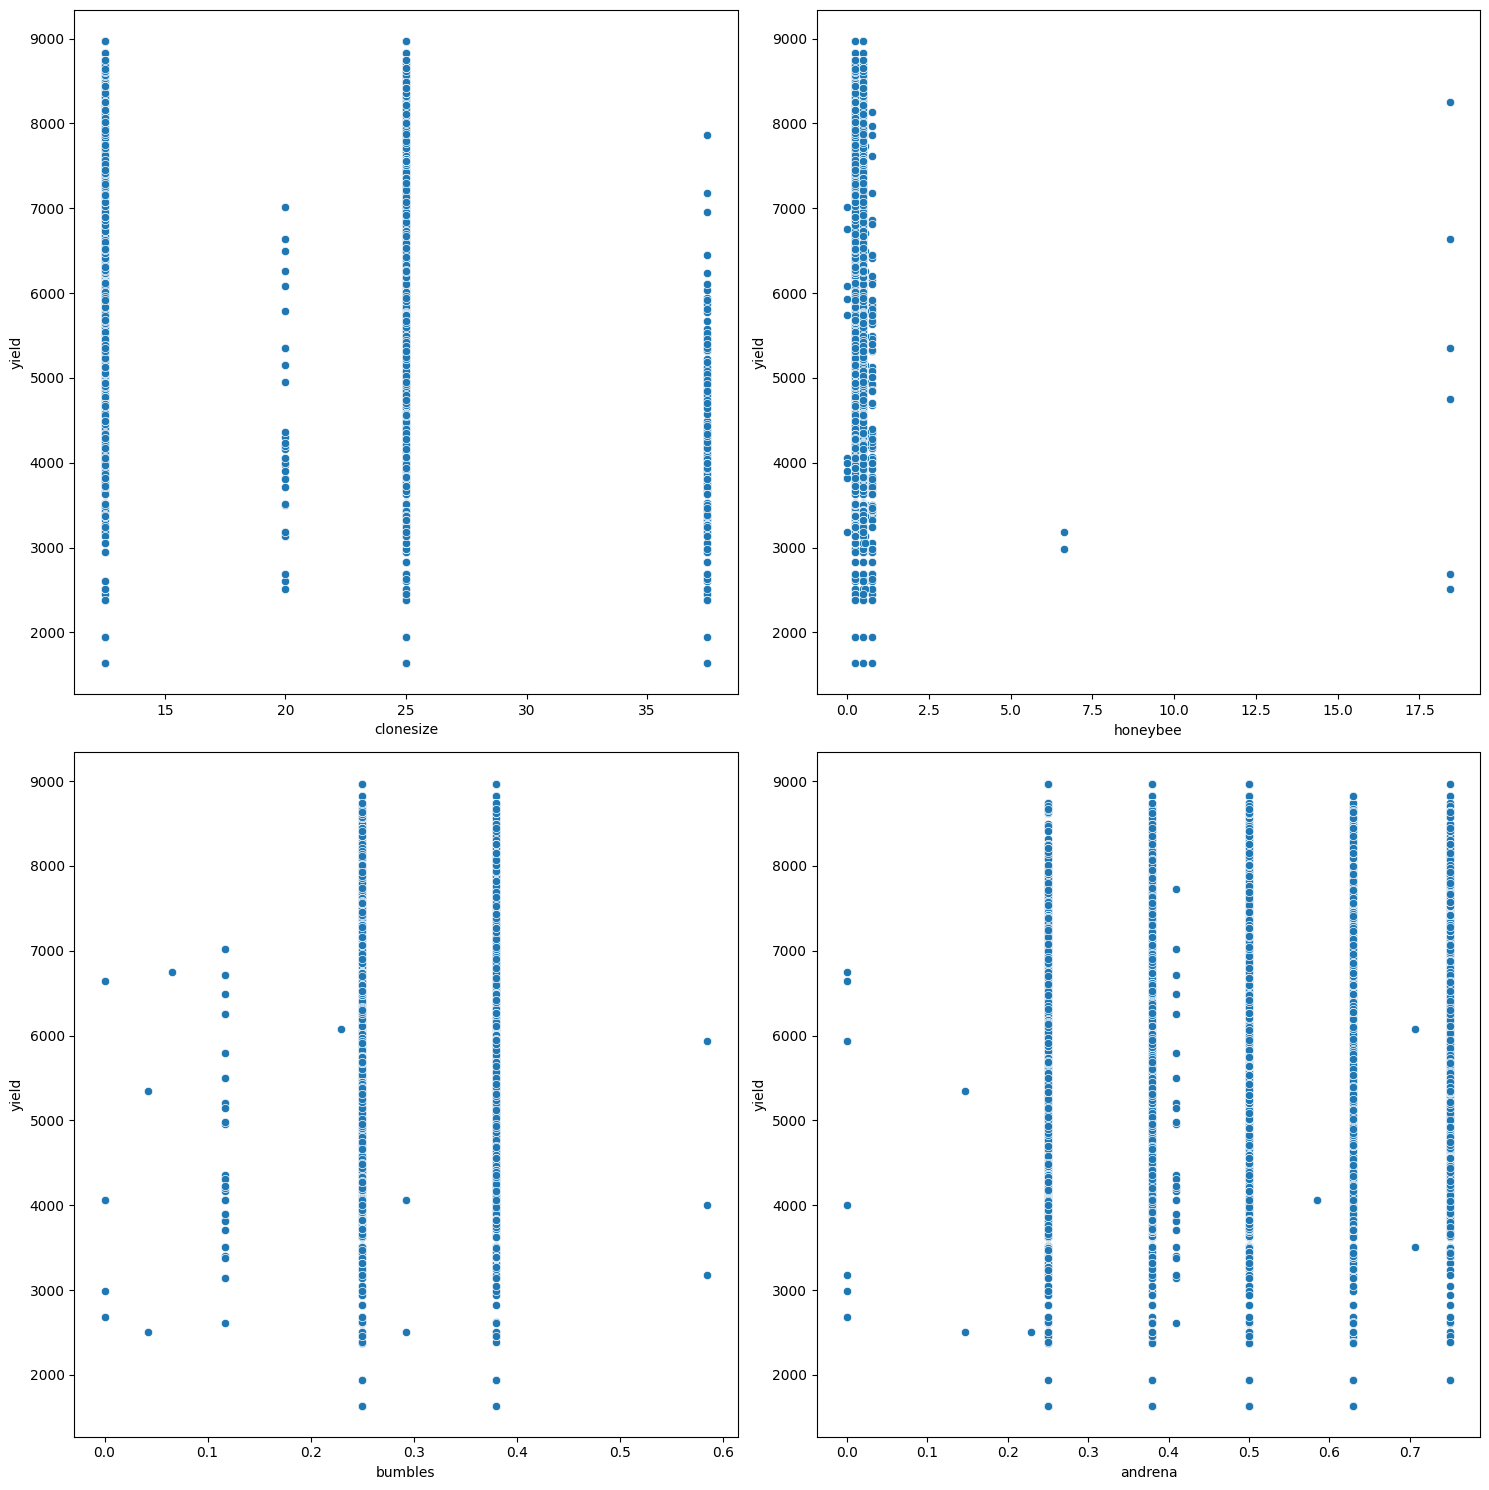

In [21]:
# Scatter plot of some features vs. yield
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.scatterplot(data=train_data, x='clonesize', y='yield', ax=axes[0, 0])
sns.scatterplot(data=train_data, x='honeybee', y='yield', ax=axes[0, 1])
sns.scatterplot(data=train_data, x='bumbles', y='yield', ax=axes[1, 0])
sns.scatterplot(data=train_data, x='andrena', y='yield', ax=axes[1, 1])
plt.tight_layout()
plt.show()

5. PROCESS THE DATA

In [22]:
# Separate features and target
X_train = train_data.drop(['id', 'yield'], axis=1)
y_train = train_data['yield']
X_test = test_data.drop('id', axis=1)


In [23]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Convert back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

6. TRAIN MODELS

In [25]:
# Split the training data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)


In [26]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_split, y_train_split)


LinearRegression()

In [27]:
# Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_split, y_train_split)


Lasso()

In [28]:
# Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_split, y_train_split)

Ridge()

7. EVALUATE MODELS

In [29]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    return mae

print("Linear Regression MAE:", evaluate_model(lr_model, X_val, y_val))
print("Lasso MAE:", evaluate_model(lasso_model, X_val, y_val))
print("Ridge MAE:", evaluate_model(ridge_model, X_val, y_val))

Linear Regression MAE: 282.4054348953508
Lasso MAE: 278.42067607834673
Ridge MAE: 279.00456881387805


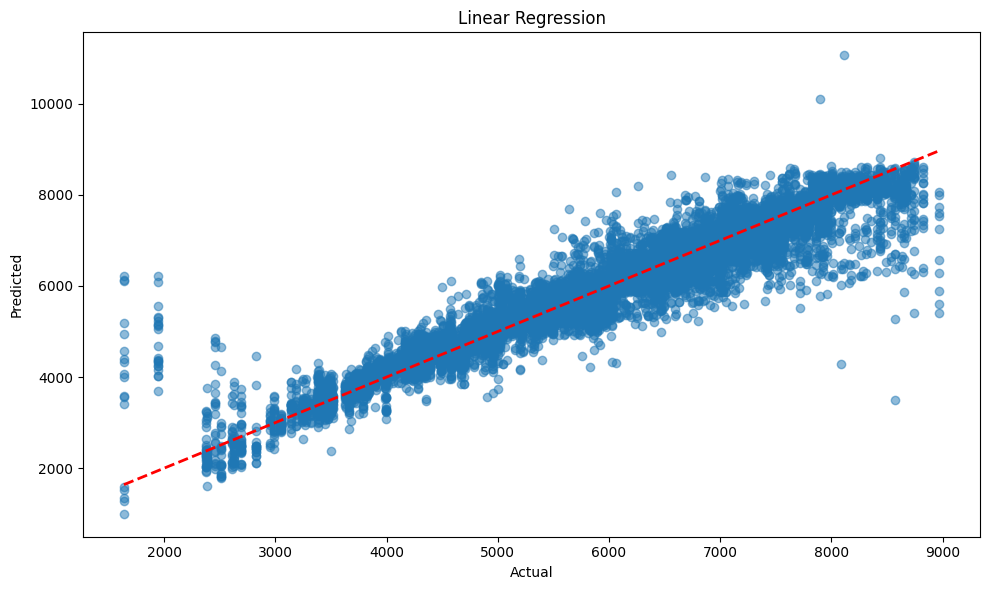

Linear Regression CV Score: 214624698022.04572


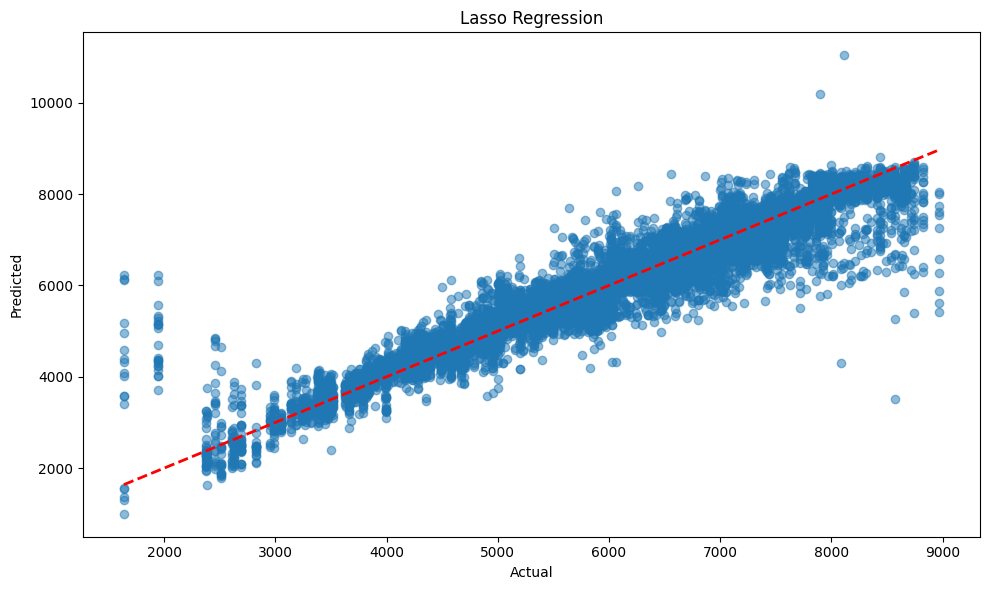

Lasso Regression CV Score: 277.55613248486674


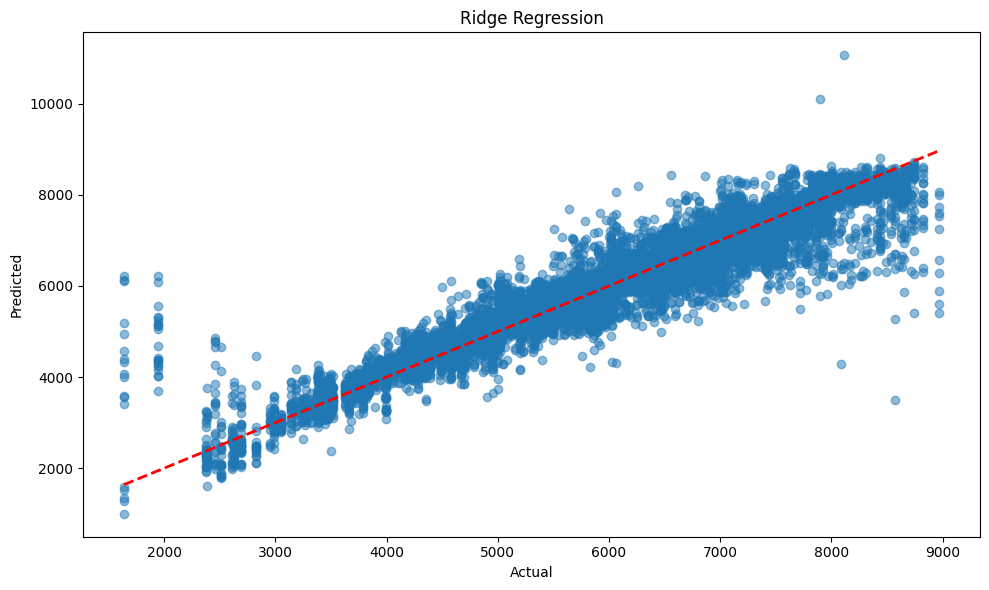

Ridge Regression CV Score: 277.8139056702235


In [31]:
from sklearn.model_selection import cross_val_score

def plot_predictions(model, X, y, title):
    y_pred = model.predict(X)
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
plot_predictions(lr_model, X_train_scaled, y_train, "Linear Regression")
print("Linear Regression CV Score:", cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error').mean() * -1)

# Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)
plot_predictions(lasso_model, X_train_scaled, y_train, "Lasso Regression")
print("Lasso Regression CV Score:", cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error').mean() * -1)

# Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
plot_predictions(ridge_model, X_train_scaled, y_train, "Ridge Regression")
print("Ridge Regression CV Score:", cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error').mean() * -1)

8. MAKE PREDICTIONS ON THE TEST

In [ ]:
# Choose the best performing model 
final_model = lr_model
final_predictions = final_model.predict(X_test_scaled)


In [ ]:
# Create submission file
submission = pd.DataFrame({'id': test_data['id'], 'yield': final_predictions})
submission.to_csv('submission.csv', index=False)